# Basic Data Handling with Pandas

---
## Learning Objectives
By the end of this module, learners will be able to:
- Load tabular data (e.g. .csv files) into Python using pandas
- Perform basic operations: filtering rows, accessing columns, and sorting data
- Generate quick visualizations like histograms and line plots using pandas plotting

---
## Working with `pandas`
**What is pandas?**

`pandas` is a Python library used for working with structured data (like spreadsheets or CSV files). It provides a DataFrame object—a table with rows and columns—similar to Excel but with far more flexibility for scientific workflows.

**Reading a `.csv` file**

A `.csv` (comma-separated values) file stores data in a plain-text table format.

In [1]:
import pandas as pd

df = pd.read_csv("data/cell_counts.csv")

This reads the file and stores it in a variable df (short for DataFrame).

---
## Hands-on — Reading and Exploring Data
We have a file called `cell_counts.csv`:

**Step 1: Read the CSV**

In [2]:
import pandas as pd

df = pd.read_csv("data/cell_counts.csv")
print(df)

  SampleID Condition  CellCount
0       S1   Treated        150
1       S2   Treated        145
2       S3   Control        200
3       S4   Control        190


**Step 2: Accessing Columns**

In [3]:
# Access CellCount column
print(df["CellCount"])

0    150
1    145
2    200
3    190
Name: CellCount, dtype: int64


**Step 3: Filtering Rows**

In [4]:
# Get only treated samples
treated = df[df["Condition"] == "Treated"]
print(treated)

  SampleID Condition  CellCount
0       S1   Treated        150
1       S2   Treated        145


**Step 4: Sorting Data**

In [5]:
# Sort by CellCount
sorted_df = df.sort_values("CellCount")
print(sorted_df)

  SampleID Condition  CellCount
1       S2   Treated        145
0       S1   Treated        150
3       S4   Control        190
2       S3   Control        200


---
## Quick Visualizations
### Histogram — Distribution of Cell Counts

<Axes: >

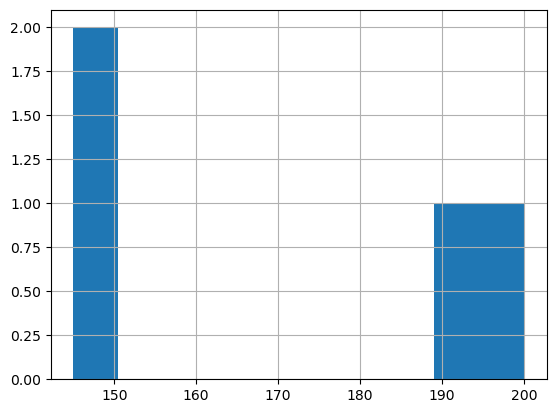

In [6]:
df["CellCount"].hist()

### Line Plot — Trend across samples

<Axes: xlabel='SampleID'>

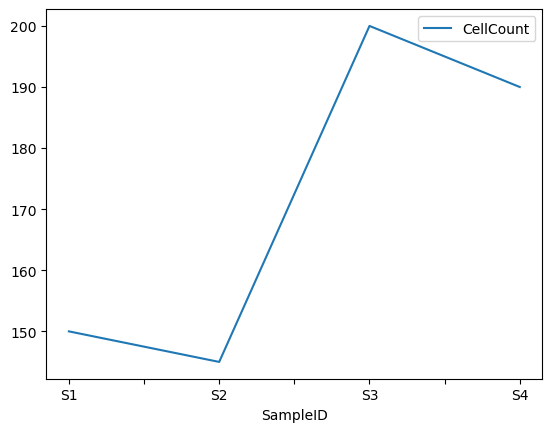

In [7]:
df.plot(x="SampleID", y="CellCount", kind="line")

These plots give a quick overview of your dataset—useful for spotting trends or outliers in experimental data.

---
## Exercise
**Scenario:**
You’re studying cell proliferation in response to a drug. You receive a `.csv` file called `proliferation.csv` with the following structure:

**Task:**
-  Read the file into a DataFrame.
- Filter the rows for time point 24.
- Sort all rows by CellCount in descending order.
- Plot a line plot of average CellCount across time points.

*Hints:*
- Use `groupby()` and `mean()` for averaging
- Use df.plot() for line plot

<Axes: xlabel='TimePoint'>

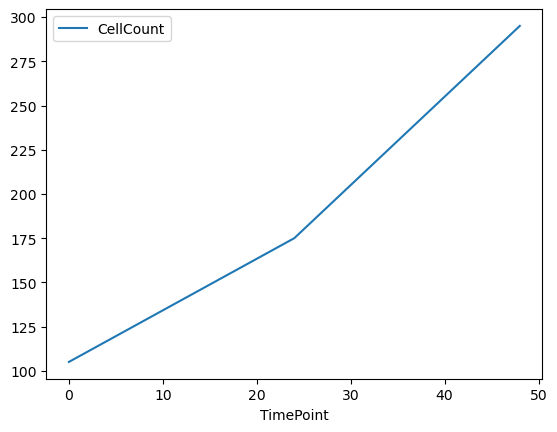

In [8]:
df = pd.read_csv("data/proliferation.csv")

# Filter
tp24 = df[df["TimePoint"] == 24]

# Sort
sorted_df = df.sort_values("CellCount", ascending=False)

# Average CellCount per TimePoint
avg = df.groupby("TimePoint")["CellCount"].mean().reset_index()

# Plot
avg.plot(x="TimePoint", y="CellCount", kind="line")

---
## Summary
| **Concept**        | **What It Means**                                       | **Example Code**                                     | **Why It Matters (Bio Use Case)**                   |
| ------------------ | ------------------------------------------------------- | ---------------------------------------------------- | --------------------------------------------------- |
| Read a `.csv` file | Load spreadsheet-style data into Python                 | `df = pd.read_csv("data.csv")`                       | Load CellProfiler or manual count data for analysis |
| View a column      | Access values from a specific column                    | `df["CellCount"]`                                    | Inspect cell count measurements per sample          |
| Filter rows        | Select data matching a condition                        | `df[df["Condition"] == "Treated"]`                   | Compare treated vs control sample results           |
| Sort values        | Arrange data by column values (ascending or descending) | `df.sort_values("CellCount")`                        | Identify samples with highest or lowest counts      |
| Group and average  | Compute mean values across groups                       | `df.groupby("TimePoint")["CellCount"].mean()`        | Summarize cell proliferation over time              |
| Histogram          | Plot data distribution                                  | `df["CellCount"].hist()`                             | Visualize spread and outliers in counts             |
| Line plot          | Show trends across categories or timepoints             | `df.plot(x="TimePoint", y="CellCount", kind="line")` | Observe temporal trends in experimental results     |
